#### This script is showing how a very simple model performed, why it was not used in the project, and why a pre-existing model was used instead.

## 1. Importing Modules

In [1]:
import numpy as np

import keras

from keras import backend as K

from keras.layers import Activation

from keras.optimizers import Adam

from keras.metrics import categorical_crossentropy

from keras.preprocessing.image import ImageDataGenerator

from keras.layers.normalization import BatchNormalization

from keras.layers.convolutional import *

from sklearn.metrics import confusion_matrix

import itertools

import matplotlib.pyplot as plt

%matplotlib inline

/Users/athanasiostsiaras/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential

Imported Sequential from keras.models, to initialise our neural network model as a sequential network. There are two basic ways of initialising a neural network, either by a sequence of layers or as a graph.

In [3]:
from keras.layers import Conv2D

Imported Conv2D from keras.layers, this is to perform the convolution operation i.e the first step of a CNN, on the training images. Since we are working on images here, which a basically 2 Dimensional arrays, we’re using Convolution 2-D, you may have to use Convolution 3-D while dealing with videos, where the third dimension will be time.

In [4]:
from keras.layers import MaxPooling2D

Imported MaxPooling2D from keras.layers, which is used for pooling operation, that is the step — 2 in the process of building a cnn. For building this particular neural network, we are using a Maxpooling function, there exist different types of pooling operations like Min Pooling, Mean Pooling, etc. Here in MaxPooling we need the maximum value pixel from the respective region of interest.

In [5]:
from keras.layers import Flatten

Imported Flatten from keras.layers, which is used for Flattening. Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.

In [6]:
from keras.layers import Dense

Imported Dense from keras.layers, which is used to perform the full connection of the neural network, which is the step 4 in the process of building a CNN.

In [7]:
train_path='training_set'
test_path = 'test_set'
validation_path = 'validation_set'

In [25]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), 
                                                         classes=['Burned', 'Intact', 'NotaHouse'], batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), 
                                                         classes=['Burned', 'Intact', 'NotaHouse'], batch_size=3)

validation_batches = ImageDataGenerator().flow_from_directory(validation_path, target_size=(224,224), 
                                                         classes=['Burned', 'Intact', 'NotaHouse'], batch_size=2)

Found 39 images belonging to 3 classes.
Found 6 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [8]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), 
                                                         classes=['Burned', 'Intact'], batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), 
                                                         classes=['Burned', 'Intact'], batch_size=3)

validation_batches = ImageDataGenerator().flow_from_directory(validation_path, target_size=(224,224), 
                                                         classes=['Burned', 'Intact'], batch_size=2)

Found 37 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


Also, defining a plots function to plot images and their labels

In [9]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

## 2. Shaping the neural network

Initializing an empty object of sequential type, and then added a convolution layer by using the “Conv2D” function. The Conv2D function is taking 4 arguments, the first is the number of filters i.e 32 here, the second argument is the shape each filter is going to be i.e 3x3 here, the third is the input shape and the type of image(RGB or Black and White)of each image i.e the input image our CNN is going to be taking is of a 224x224 resolution and “3” stands for RGB, which is a colour img, the fourth argument is the activation function we want to use, here ‘relu’ stands for a rectifier function.

In [10]:
classifier = Sequential()

In [11]:
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

Performing a pooling operation to reduce the size of images as much as possible.

In [12]:
#classifier.add(MaxPooling2D(pool_size = (2, 2)))

Converting all the pooled images to a continuous vector using flattening.

In [13]:
classifier.add(Flatten())

In this step we created a fully connected layer, and to this layer we connected the set of nodes we got after the flattening step, these nodes will act as an input layer to these fully-connected layers. As this layer will be present between the input layer and output layer, we can refer to it a hidden layer.

Dense is the function to add a fully connected layer, ‘units’ is where we define the number of nodes that should be present in this hidden layer, these units value will be always between the number of input nodes and the output nodes but the art of choosing the most optimal number of nodes can be achieved only through experimental tries. Though it’s a common practice to use a power of 2. And the activation function will be a rectifier function.

In [17]:
#classifier.add(Dense(units = 128, activation = 'relu'))

Now it’s time to initialise our output layer, which should contain only one node, as it is binary classification. This single node will give us a binary output of either a Burnt or Intact.

In [14]:
classifier.add(Dense(units = 2, activation = 'softmax'))

##### Compiling the model:  
-Optimizer parameter is to choose the stochastic gradient descent algorithm.  
-Loss parameter is to choose the loss function.  
-Finally, the metrics parameter is to choose the performance metric.

In [15]:
classifier.compile(Adam(lr=.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 3. Fitting the model

- So before we fit our images to the neural network, we need to perform some image augmentations on them, which is basically synthesising the training data. We are going to do this using keras.preprocessing library for doing the synthesising part as well as to prepare the training set as well as the test test set of images that are present in a properly structured directories, where the directory’s name is take as the label of all the images present in it. For example : All the images inside the ‘Burned’ named folder will be considered as burned homes by keras.

In [16]:
classifier.fit_generator(train_batches, steps_per_epoch=4, # = size of data/ batch size
                    validation_data=validation_batches, validation_steps=4,
                    epochs=5, verbose=2
)

Epoch 1/5
 - 2s - loss: 8.3273 - acc: 0.4830 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 2s - loss: 9.1518 - acc: 0.4322 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 2s - loss: 9.1518 - acc: 0.4322 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 2s - loss: 9.1518 - acc: 0.4322 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 2s - loss: 9.1518 - acc: 0.4322 - val_loss: 8.0590 - val_acc: 0.5000


- In the above code, ‘steps_per_epoch’ holds the number of training images, i.e the number of images the training_set folder contains.
And ‘epochs’, a single epoch is a single step in training a neural network; in other words when a neural network is trained on every training samples only in one pass we say that one epoch is finished. So the training process should consist of more than one epochs.

#### Making predictions

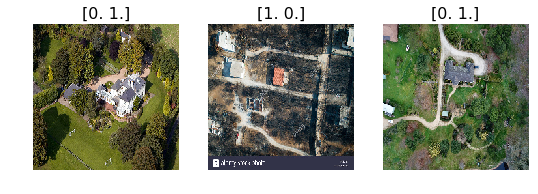

In [17]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [18]:
test_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [19]:
predictions = classifier.predict_generator(test_batches, steps=1, verbose=0)

In [20]:
predictions

array([[1., 0.]], dtype=float32)

#### It is naive to thing that such a simple model, trained in so few images, can actually do good in predicting so complex aerial pictures. The solution to this is actually using a pre-existing model that we will fine-tune to our project